## 첫번째 - 지하철 8호선 승하차 인원 분석

In [735]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [736]:
# 데이터 불러오기
metro_all = pd.read_csv("data/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv", encoding="cp949")

In [737]:
# 승하차 인원 정보 상위 5개의 데이터
metro_all.head()

# 승하차 인원 정보 데이터프레임 정보 요약
metro_all.info()

# 사용월 데이터 확인 2015년 1월 - 2023년 6월
sorted(list(set(metro_all["사용월"])))

# 호선명 데이터 확인
sorted(list(set(metro_all['호선명'])))

# 지하철역 데이터 확인
sorted(list(set(metro_all["지하철역"])))

# 지하철역 데이터 개수 확인
len(list(set(metro_all["지하철역"])))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60022 entries, 0 to 60021
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           60022 non-null  int64 
 1   호선명           60022 non-null  object
 2   지하철역          60022 non-null  object
 3   04시-05시 승차인원  60022 non-null  int64 
 4   04시-05시 하차인원  60022 non-null  int64 
 5   05시-06시 승차인원  60022 non-null  int64 
 6   05시-06시 하차인원  60022 non-null  int64 
 7   06시-07시 승차인원  60022 non-null  int64 
 8   06시-07시 하차인원  60022 non-null  int64 
 9   07시-08시 승차인원  60022 non-null  int64 
 10  07시-08시 하차인원  60022 non-null  int64 
 11  08시-09시 승차인원  60022 non-null  int64 
 12  08시-09시 하차인원  60022 non-null  int64 
 13  09시-10시 승차인원  60022 non-null  int64 
 14  09시-10시 하차인원  60022 non-null  int64 
 15  10시-11시 승차인원  60022 non-null  int64 
 16  10시-11시 하차인원  60022 non-null  int64 
 17  11시-12시 승차인원  60022 non-null  int64 
 18  11시-12시 하차인원  60022 non-null  int64 
 19  12시-

589

In [738]:
# 2023년 6월 총 승객수만 추출
metro_recent = metro_all[metro_all["사용월"]==202306]
metro_recent.head(1)

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202306,1호선,동대문,854,33,11997,2157,9533,7157,14547,...,9146,624,2562,3,247,0,0,0,0,20230703


In [739]:
# 불필요한 작업일자 컬럼 제거
metro_recent = metro_recent.drop(columns={'작업일자'})
metro_recent.head(1)

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,202306,1호선,동대문,854,33,11997,2157,9533,7157,14547,...,5020,9146,624,2562,3,247,0,0,0,0


In [740]:
line = '8호선'
metro_st = metro_recent.groupby(['호선명','지하철역']).mean().reset_index()
metro_st_line8 = metro_st[metro_st['호선명']==line]
metro_st_line8.head(1)

,호선명,지하철역,사용월,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
260,8호선,가락시장,202306.0,147.0,3.0,3174.0,2672.0,6015.0,7524.0,10831.0,...,4096.0,4304.0,846.0,2259.0,2.0,492.0,0.0,0.0,0.0,0.0


In [741]:
# 승차 인원 컬럼만 추출
metro_get_on = pd.DataFrame()
metro_get_on['지하철역'] = metro_st_line8['지하철역']
for i in range(int((len(metro_recent.columns)-3)/2)):
    metro_get_on[metro_st_line8.columns[3+2*i]] = metro_st_line8[metro_st_line8.columns[3+2*i]]
metro_get_on = metro_get_on.set_index('지하철역')
metro_get_on.head(1)

,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,10시-11시 승차인원,11시-12시 승차인원,12시-13시 승차인원,13시-14시 승차인원,...,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원
지하철역,,,,,,,,,,,,,,,,,,,,,
가락시장,147.0,3174.0,6015.0,10831.0,13375.0,10956.0,10216.0,10325.0,10357.0,10670.0,...,27098.0,11713.0,10960.0,10662.0,8770.0,4096.0,846.0,2.0,0.0,0.0


In [742]:
# 하차 인원 컬럼만 추출
metro_get_off = pd.DataFrame()
metro_get_off['지하철역'] = metro_st_line8['지하철역']
for i in range(int((len(metro_recent.columns)-3)/2)):
    metro_get_off[metro_st_line8.columns[4+2*i]] = metro_st_line8[metro_st_line8.columns[4+2*i]]
metro_get_off = metro_get_off.set_index('지하철역')
metro_get_off.head(1)

,04시-05시 하차인원,05시-06시 하차인원,06시-07시 하차인원,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,10시-11시 하차인원,11시-12시 하차인원,12시-13시 하차인원,13시-14시 하차인원,...,18시-19시 하차인원,19시-20시 하차인원,20시-21시 하차인원,21시-22시 하차인원,22시-23시 하차인원,23시-24시 하차인원,00시-01시 하차인원,01시-02시 하차인원,02시-03시 하차인원,03시-04시 하차인원
지하철역,,,,,,,,,,,,,,,,,,,,,
가락시장,3.0,2672.0,7524.0,14999.0,38623.0,16893.0,11898.0,10685.0,10964.0,10952.0,...,20221.0,14146.0,9587.0,8895.0,6979.0,4304.0,2259.0,492.0,0.0,0.0


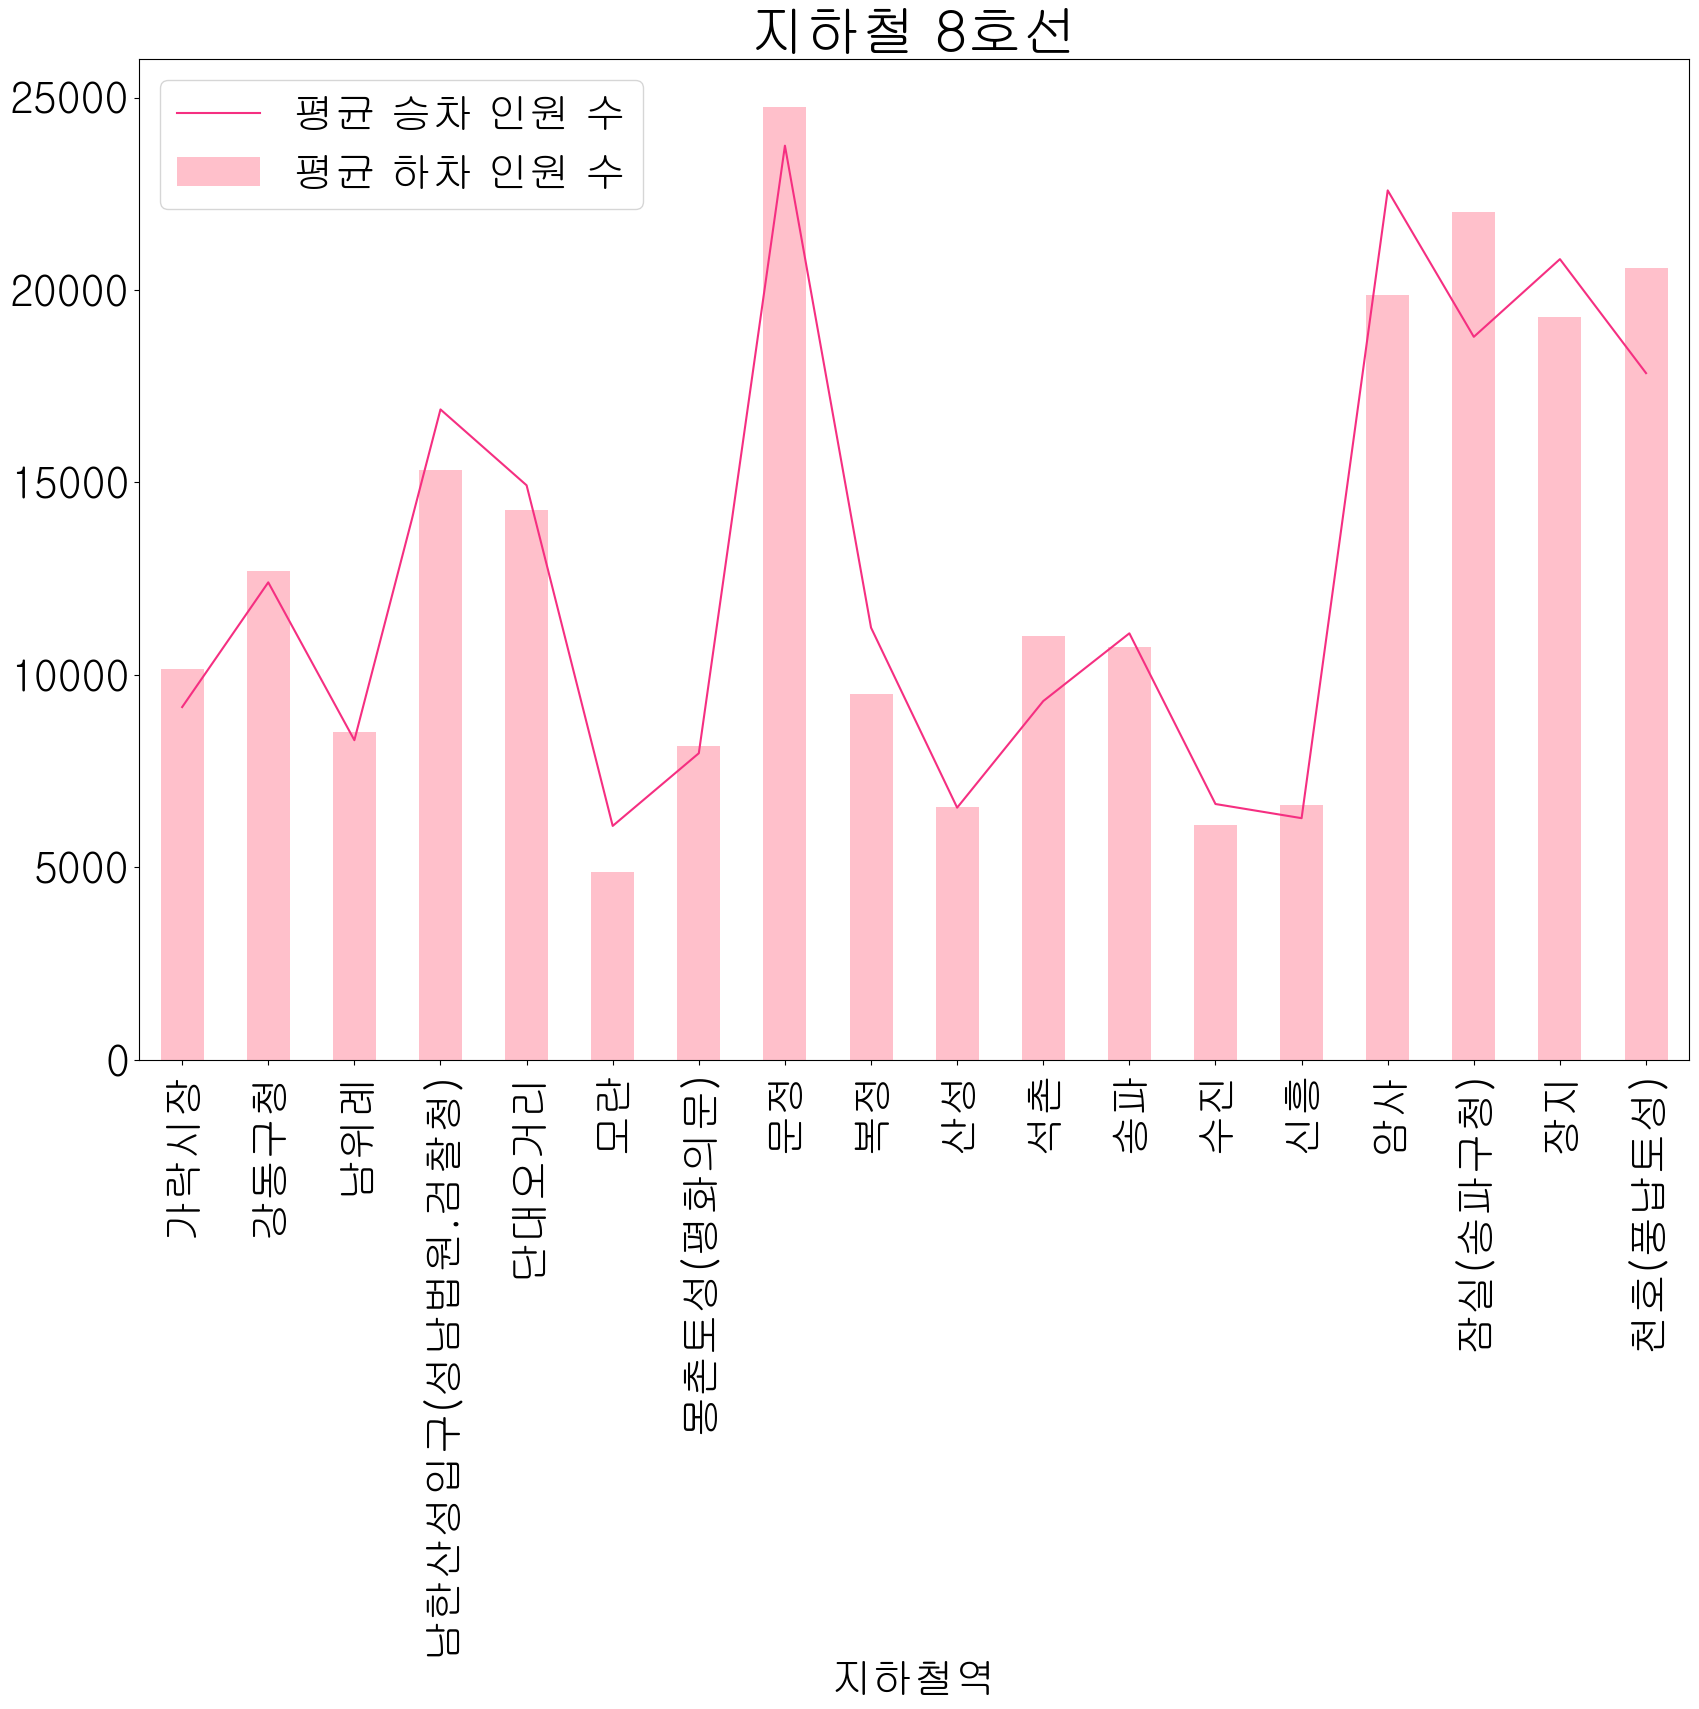

In [743]:
plt.figure(figsize=(20,13))
df = pd.DataFrame(index = metro_st_line8['지하철역'])
df['평균 승차 인원 수'] = metro_get_on.mean(axis=1).astype(int).plot(color="#F52F81",label="평균 승차 인원 수")
df['평균 햐차 인원 수'] = metro_get_off.mean(axis=1).astype(int).plot(kind="bar",color="pink",label="평균 하차 인원 수")
plt.legend()
plt.title("지하철 8호선",size=40)
plt.show()

In [744]:
# 역 별 평균 승하차 인원을 구한 후 정수로 형 변환하여 데이터프레임으로 저장
df = pd.DataFrame(index = metro_st_line8['지하철역'])
df['평균 승차 인원 수'] = metro_get_on.mean(axis=1).astype(int)
df['평균 햐차 인원 수'] = metro_get_off.mean(axis=1).astype(int)
df

,평균 승차 인원 수,평균 햐차 인원 수
지하철역,,
가락시장,9166,10143
강동구청,12406,12699
남위례,8306,8531
남한산성입구(성남법원.검찰청),16898,15336
단대오거리,14927,14294
모란,6079,4893
몽촌토성(평화의문),7967,8157
문정,23749,24765
복정,11229,9515


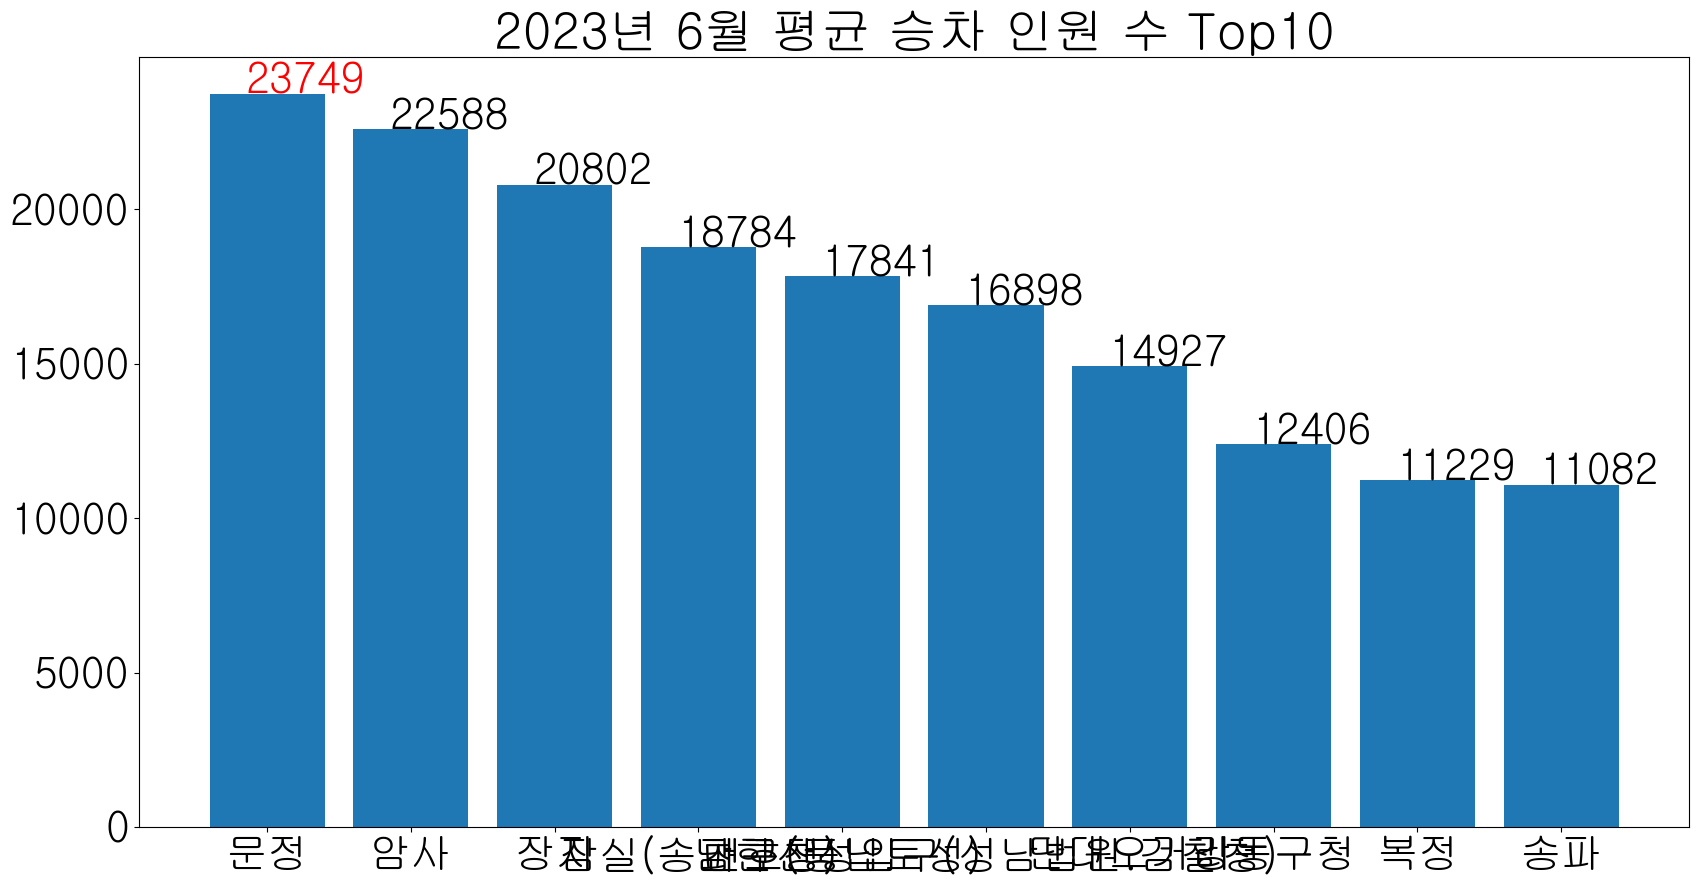

In [745]:
# 승차 인원 수 Top10
top10_on = df.sort_values(by='평균 승차 인원 수', ascending=False).head(10)

plt.rc('font', size=30)
plt.figure(figsize=(20,10))
plt.bar(top10_on.index, top10_on['평균 승차 인원 수'])
for x, y in enumerate(list(top10_on['평균 승차 인원 수'])):
    if x == 0:
        plt.annotate(y, (x-0.15, y), color = 'red')
    else:
        plt.annotate(y, (x-0.15, y))
        
plt.title('2023년 6월 평균 승차 인원 수 Top10')
plt.show()